## **PFDA Assignment 5: Risk**

Author: *Paul Cahill*

In this assignment I will simulate 1000 individual battle rounds in Risk (3 attackers vs 2 defenders) and plots the result.

To begin I will import the libraries:

In [1]:
# Numerical Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

Each individual game of Risk involves 3 attacker rolls and 2 defender rolls of a 6 sided dice.

We will need two sets of random integars (min 1, max 6) to simulate the dice rolls, one set producing 3 numbers and the other producing 2. we will then need to order these from largest to smallest for both sets.

Then we will need to calculate the losses per team based on these numbers.

I have decided to carry this out as a function which will calculate the losses.

In [2]:
def simulated_battle():
    attacker_rolls = np.sort(np.random.randint(1, 7, 3))[::-1]
    defender_rolls = np.sort(np.random.randint(1, 7, 2))[::-1]

    attacker_losses = 0
    defender_losses = 0
    
    for attack, defend in zip(attacker_rolls[:len(defender_rolls)], defender_rolls):
        if attack > defend:
            defender_losses += 1
        else:
            attacker_losses += 1

    return attacker_losses, defender_losses

Next we will define the winning conditions and the number of rounds that should be carried out:

In [3]:
def simulate_games(rounds):
    attacker_wins = 0
    defender_wins = 0

    for _ in range(rounds):
        attacker_units = 3
        defender_units = 2
        while attacker_units > 0 and defender_units > 0:
            attacker_losses, defender_losses = simulated_battle()
            attacker_units -= attacker_losses
            defender_units -= defender_losses
        if attacker_units > 0:
            attacker_wins += 1
        else:
            defender_wins += 1
    return attacker_wins, defender_wins

# Simulate games
rounds = 1000
attacker_wins, defender_wins = simulate_games(rounds)

Lastly we just need to plot our (pseudo)randomly generated data.

I have decided to display the data as a pie chart showing the wins per side.

Judging from my results (after running the code several times), the attcaker has an clear advantage in the game of Risk.

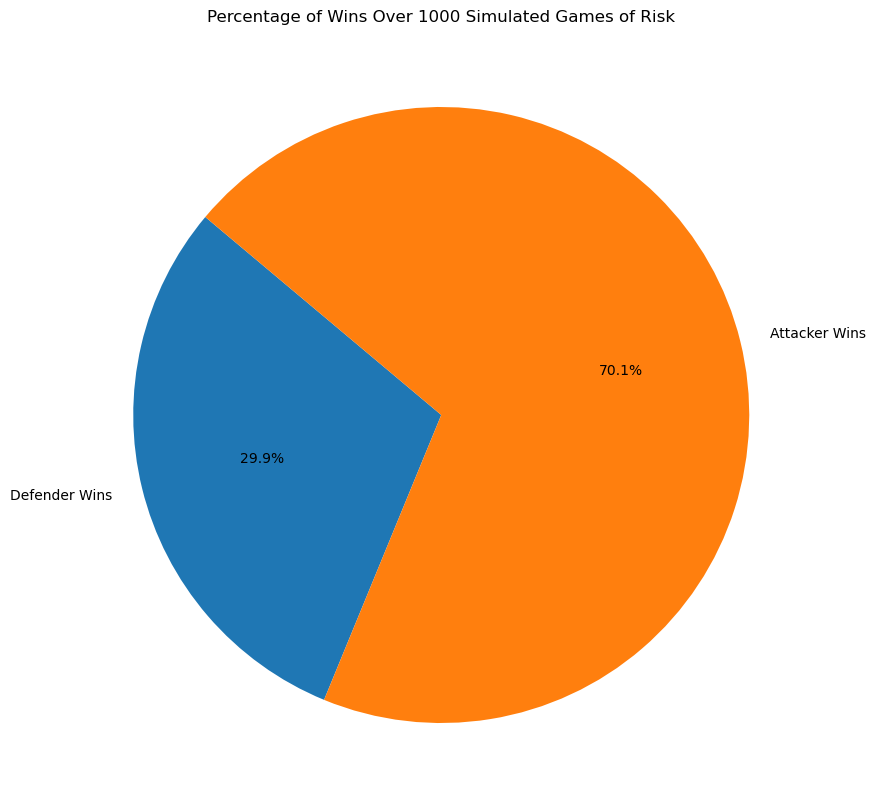

In [4]:
labels = ['Defender Wins', 'Attacker Wins']
wins = [defender_wins, attacker_wins]

plt.figure(figsize=(10, 10))
plt.pie(wins, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Percentage of Wins Over 1000 Simulated Games of Risk')
plt.show()

***

## References

Matplotlib guide to pie charts: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

Risk Rules: https://www.ultraboardgames.com/risk/game-rules.php

Similar Stackoverflow Example: https://stackoverflow.com/questions/74421396/risk-game-with-python

W3 Schools Functions Guide: https://www.w3schools.com/python/python_functions.asp

***